Question #6

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

'Chicago'

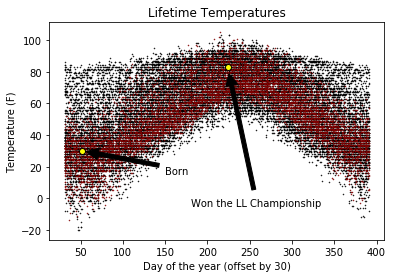

In [110]:
Indianapolis = pd.read_csv("Indianapolis.txt")
Pittsburgh = pd.read_csv('Pittsburgh.txt')
Miami = pd.read_csv('Miami.txt')
Washington = pd.read_csv('Washington.txt')
Chicago = pd.read_csv('Chicago.txt')

city_list = [Indianapolis,Pittsburgh,Miami,Washington,Chicago]

i=0
for c in city_list:
    i = i + 1
    c["ID1"]= pd.to_numeric(pd.to_datetime(c.DATE, format="%Y%m%d").apply(lambda x:x.strftime('%d')))
    c["ID2"]= pd.to_numeric(pd.to_datetime(c.DATE, format="%Y%m%d").apply(lambda x:x.strftime('%m')))
    c["ID"] = c.ID1 + 30 * c.ID2
    if i == 5:
        plt.plot(c.ID,c.TMAX,'.',markersize=1,color='#800000')
        plt.plot(c.ID,c.TMIN,'.',markersize=1,color='#800000')
    else:
        plt.plot(c.ID,c.TMAX,'.',markersize=1,color='k')
        plt.plot(c.ID,c.TMIN,'.',markersize=1,color='k')


plt.plot([22+30], [30], color='k', marker='o', markerfacecolor='#FFFF00')
plt.plot([14+30*7], [83], color='k', marker='o', markerfacecolor='#FFFF00')
plt.annotate('Born', xy=(22+30,30), xytext=(150,15), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Won the LL Championship', xy=(14+30*7,83), xytext=(180,-5), arrowprops=dict(facecolor='black', shrink=0.05))
plt.title("Lifetime Temperatures")
plt.xlabel("Day of the year (offset by 30)")
plt.ylabel("Temperature (F)")

plt.show()

Question #7

Midpoint : 236.04


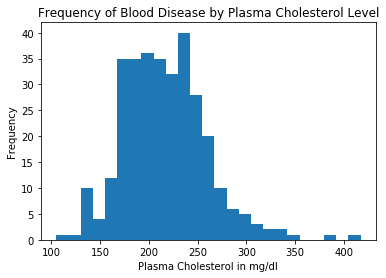

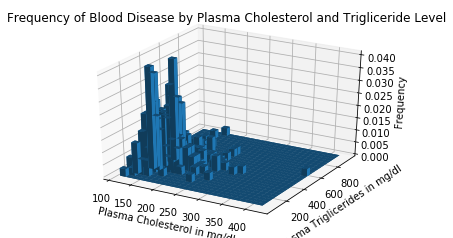

Judging from the 3D graph, we observe that those with low to middle plasma cholesterol have signs of blood disease, regardless ofwhether or not they have high or low levels of triglicerides. However, it should be noted that on average, those with high trigliceridelevels also had higher blood disease prevelance in a broad sense; it just does not appear visually significant.


In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('lipids.csv', header=4)
data = data[data['diseased'] == 1]
n, bins, p = plt.hist(data['chol'], 25)
mid = np.argmax(n)
midpoint = (bins[mid + 1] + bins[mid]) / 2
print("Midpoint :", midpoint)

plt.xlabel('Plasma Cholesterol in mg/dl')
plt.ylabel('Frequency')
plt.title('Frequency of Blood Disease by Plasma Cholesterol Level')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
hist, x_t, y_t = np.histogram2d(data['chol'], data['trig'], bins=25)
hist = hist / hist.sum()
x = x_t[:-1] + 0.5 * (x_t[1] - x_t[0])
y = y_t[:-1] + 0.5 * (y_t[1] - y_t[0])
X,Y = np.meshgrid(x,y)
X = X.flatten()
Y = Y.flatten()
Z = np.zeros((len(x_t) - 1) * (len(y_t) - 1))
dx = (x[1] - x[0])
dy = (y[1] - y[0])
dz = hist.flatten()

ax.bar3d(X, Y, Z, dx, dy, dz)
ax.set_xlabel('Plasma Cholesterol in mg/dl')
ax.set_ylabel('Plasma Triglicerides in mg/dl')
ax.set_zlabel('Frequency')
plt.title('Frequency of Blood Disease by Plasma Cholesterol and Trigliceride Level')
plt.show()

print("Judging from the 3D graph, we observe that those with low to middle plasma cholesterol have signs of blood disease, regardless of"
      "whether or not they have high or low levels of triglicerides. However, it should be noted that on average, those with high trigliceride"
      "levels also had higher blood disease prevelance in a broad sense; it just does not appear visually significant.")